In [1]:
!nvidia-smi

Mon Aug 26 20:48:18 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 555.99                 Driver Version: 555.99         CUDA Version: 12.5     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 2050      WDDM  |   00000000:01:00.0 Off |                  N/A |
| N/A   54C    P8              3W /   35W |       0MiB /   4096MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
!pip uninstall ultralytics
!pip uninstall torch torchvision torchaudio
!pip cache purge




^C
Files removed: 986


In [3]:
import os
HOME = os.getcwd()
print(HOME)

c:\Users\91876\Downloads\MLOPS_Production_Ready_Data_Science_projects\project_3\MLops-TennisCourt-House-Detection-using-Yolov8\notebook


## Install YOLOv8

⚠️ YOLOv8 is still under heavy development. Breaking changes are being introduced almost weekly. We strive to make our YOLOv8 notebooks work with the latest version of the library. Last tests took place on **18.01.2023** with version **YOLOv8.0.9**.

If you notice that our notebook behaves incorrectly - especially if you experience errors that prevent you from going through the tutorial - don't hesitate! Let us know and open an [issue](https://github.com/roboflow/notebooks/issues) on the Roboflow Notebooks repository.

YOLOv8 can be installed in two ways - from the source and via pip. This is because it is the first iteration of YOLO to have an official package.

In [4]:
# Pip install method (recommended)

!pip install ultralytics==8.2.81

   ---------------------------------------- 0.0/869.4 kB ? eta -:--:--
   ------------------------------------ --- 786.4/869.4 kB 4.8 MB/s eta 0:00:01
   ------------------------------------ --- 786.4/869.4 kB 4.8 MB/s eta 0:00:01
   ---------------------------------------- 869.4/869.4 kB 1.4 MB/s eta 0:00:00


In [5]:
!pip install --upgrade --force-reinstall torch

   ---------------------------------------- 0.0/198.0 MB ? eta -:--:--
   ---------------------------------------- 1.0/198.0 MB 6.3 MB/s eta 0:00:32
   ---------------------------------------- 1.3/198.0 MB 3.4 MB/s eta 0:00:59
   ---------------------------------------- 2.4/198.0 MB 3.9 MB/s eta 0:00:50
    --------------------------------------- 2.6/198.0 MB 4.0 MB/s eta 0:00:50
    --------------------------------------- 3.7/198.0 MB 3.8 MB/s eta 0:00:52
    --------------------------------------- 4.5/198.0 MB 3.8 MB/s eta 0:00:52
   - -------------------------------------- 5.2/198.0 MB 3.8 MB/s eta 0:00:51
   - -------------------------------------- 6.0/198.0 MB 3.8 MB/s eta 0:00:51
   - -------------------------------------- 6.8/198.0 MB 3.8 MB/s eta 0:00:51
   - -------------------------------------- 7.6/198.0 MB 3.8 MB/s eta 0:00:50
   - -------------------------------------- 8.4/198.0 MB 3.8 MB/s eta 0:00:50
   - -------------------------------------- 9.2/198.0 MB 3.8 MB/s eta 0

In [6]:
from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.81  Python-3.9.19 torch-2.4.0+cpu CPU (11th Gen Intel Core(TM) i7-11800H 2.30GHz)
Setup complete  (16 CPUs, 15.7 GB RAM, 171.1/454.6 GB disk)


In [7]:
from ultralytics import YOLO

from IPython.display import display, Image

## CLI Basics

If you want to train, validate or run inference on models and don't need to make any modifications to the code, using YOLO command line interface is the easiest way to get started. Read more about CLI in [Ultralytics YOLO Docs](https://v8docs.ultralytics.com/cli/).

```
yolo task=detect    mode=train    model=yolov8n.yaml      args...
          classify       predict        yolov8n-cls.yaml  args...
          segment        val            yolov8n-seg.yaml  args...
                         export         yolov8n.pt        format=onnx  args...
```

## Inference with Pre-trained COCO Model

### 💻 CLI

`yolo mode=predict` runs YOLOv8 inference on a variety of sources, downloading models automatically from the latest YOLOv8 release, and saving results to `runs/predict`.

In [8]:
%cd {HOME}
!yolo task=detect mode=predict model=yolov8n-obb.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg'

c:\Users\91876\Downloads\MLOPS_Production_Ready_Data_Science_projects\project_3\MLops-TennisCourt-House-Detection-using-Yolov8\notebook


c:\Users\91876\anaconda3\envs\TennisCourtHouse\lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


WARNING ⚠️ conflicting 'task=detect' passed with 'task=obb' model. Ignoring 'task=detect' and updating to 'task=obb' to match model.
Ultralytics YOLOv8.2.81 🚀 Python-3.9.19 torch-2.4.0+cpu CPU (11th Gen Intel Core(TM) i7-11800H 2.30GHz)
YOLOv8n-obb summary (fused): 187 layers, 3,080,144 parameters, 0 gradients, 8.3 GFLOPs

image 1/1 c:\Users\91876\Downloads\MLOPS_Production_Ready_Data_Science_projects\project_3\MLops-TennisCourt-House-Detection-using-Yolov8\notebook\dog.jpeg: 1024x576 82.4ms
Speed: 4.0ms preprocess, 82.4ms inference, 3.7ms postprocess per image at shape (1, 3, 1024, 576)
Results saved to runs\obb\predict
💡 Learn more at https://docs.ultralytics.com/modes/predict



  0%|          | 0.00/6.26M [00:00<?, ?B/s]
  8%|▊         | 512k/6.26M [00:00<00:01, 5.09MB/s]
 16%|█▌        | 1.00M/6.26M [00:00<00:01, 3.03MB/s]
 24%|██▍       | 1.50M/6.26M [00:00<00:01, 3.74MB/s]
 32%|███▏      | 2.00M/6.26M [00:00<00:01, 3.62MB/s]
 46%|████▌     | 2.88M/6.26M [00:00<00:00, 4.73MB/s]
 54%|█████▍    | 3.38M/6.26M [00:00<00:00, 4.48MB/s]
 62%|██████▏   | 3.88M/6.26M [00:00<00:00, 4.31MB/s]
 70%|██████▉   | 4.38M/6.26M [00:01<00:00, 4.20MB/s]
 78%|███████▊  | 4.88M/6.26M [00:01<00:00, 4.13MB/s]
 86%|████████▌ | 5.38M/6.26M [00:01<00:00, 4.09MB/s]
 94%|█████████▍| 5.88M/6.26M [00:01<00:00, 3.79MB/s]
100%|█████████▉| 6.25M/6.26M [00:01<00:00, 3.65MB/s]
100%|██████████| 6.26M/6.26M [00:01<00:00, 3.96MB/s]

  0%|          | 0.00/104k [00:00<?, ?B/s]
100%|██████████| 104k/104k [00:00<00:00, 1.00MB/s]
100%|██████████| 104k/104k [00:00<00:00, 1.00MB/s]


In [ ]:
# %cd {HOME}
# Image(filename='runs/detect/predict/dog.jpeg', height=600)

### 🐍 Python SDK

The simplest way of simply using YOLOv8 directly in a Python environment.

In [9]:
model = YOLO(f'{HOME}/yolov8n-obb.pt')
results = model.predict(source='https://media.roboflow.com/notebooks/examples/dog.jpeg', conf=0.25)


Found https://media.roboflow.com/notebooks/examples/dog.jpeg locally at dog.jpeg
image 1/1 c:\Users\91876\Downloads\MLOPS_Production_Ready_Data_Science_projects\project_3\MLops-TennisCourt-House-Detection-using-Yolov8\notebook\dog.jpeg: 1024x576 82.3ms
Speed: 7.4ms preprocess, 82.3ms inference, 0.0ms postprocess per image at shape (1, 3, 1024, 576)


In [10]:
# Run predictions on an image
results = model(source='https://media.roboflow.com/notebooks/examples/dog.jpeg')

# Accessing bounding box information
for result in results:
    boxes = result.obb.xyxy  # Bounding boxes in xyxy format
    confs = result.obb.conf  # Confidence scores
    classes = result.obb.cls  # Class labels

    # Example: print bounding box info
    for box, conf, cls in zip(boxes, confs, classes):
        print(f"Box: {box}, Confidence: {conf}, Class: {cls}")


Found https://media.roboflow.com/notebooks/examples/dog.jpeg locally at dog.jpeg
image 1/1 c:\Users\91876\Downloads\MLOPS_Production_Ready_Data_Science_projects\project_3\MLops-TennisCourt-House-Detection-using-Yolov8\notebook\dog.jpeg: 1024x576 60.5ms
Speed: 3.7ms preprocess, 60.5ms inference, 0.0ms postprocess per image at shape (1, 3, 1024, 576)
Box: tensor([  19.7584, 1185.9302,   37.4229, 1219.0181]), Confidence: 0.4702802002429962, Class: 10.0
Box: tensor([1.9832e-01, 1.2293e+03, 3.4115e+01, 1.2482e+03]), Confidence: 0.4572036564350128, Class: 10.0


In [11]:
results[0].obb.xyxy

tensor([[1.9758e+01, 1.1859e+03, 3.7423e+01, 1.2190e+03],
        [1.9832e-01, 1.2293e+03, 3.4115e+01, 1.2482e+03]])

In [12]:
results[0].obb.conf

tensor([0.4703, 0.4572])

In [13]:
results[0].obb.cls

tensor([10., 10.])

## Custom Training

In [14]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
%cd /content/drive/MyDrive/yOLOV8

/content/drive/MyDrive/yOLOV8


In [ ]:
%cd /content/drive/MyDrive/yOLOV8

!yolo task=detect mode=train model=yolov8n-obb.pt data= data.yaml epochs=25 imgsz=224 plots=True

/content/drive/MyDrive/yOLOV8
WARNING ⚠️ conflicting 'task=detect' passed with 'task=obb' model. Ignoring 'task=detect' and updating to 'task=obb' to match model.
Ultralytics YOLOv8.2.81 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=obb, mode=train, model=yolov8n-obb.pt, data=data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retin

In [ ]:
!ls runs/obb/train/

args.yaml					     P_curve.png       train_batch2.jpg
confusion_matrix_normalized.png			     PR_curve.png      train_batch45.jpg
confusion_matrix.png				     R_curve.png       train_batch46.jpg
events.out.tfevents.1724393934.7facd2624838.14412.0  results.csv       train_batch47.jpg
F1_curve.png					     results.png       val_batch0_labels.jpg
labels_correlogram.jpg				     train_batch0.jpg  val_batch0_pred.jpg
labels.jpg					     train_batch1.jpg  weights


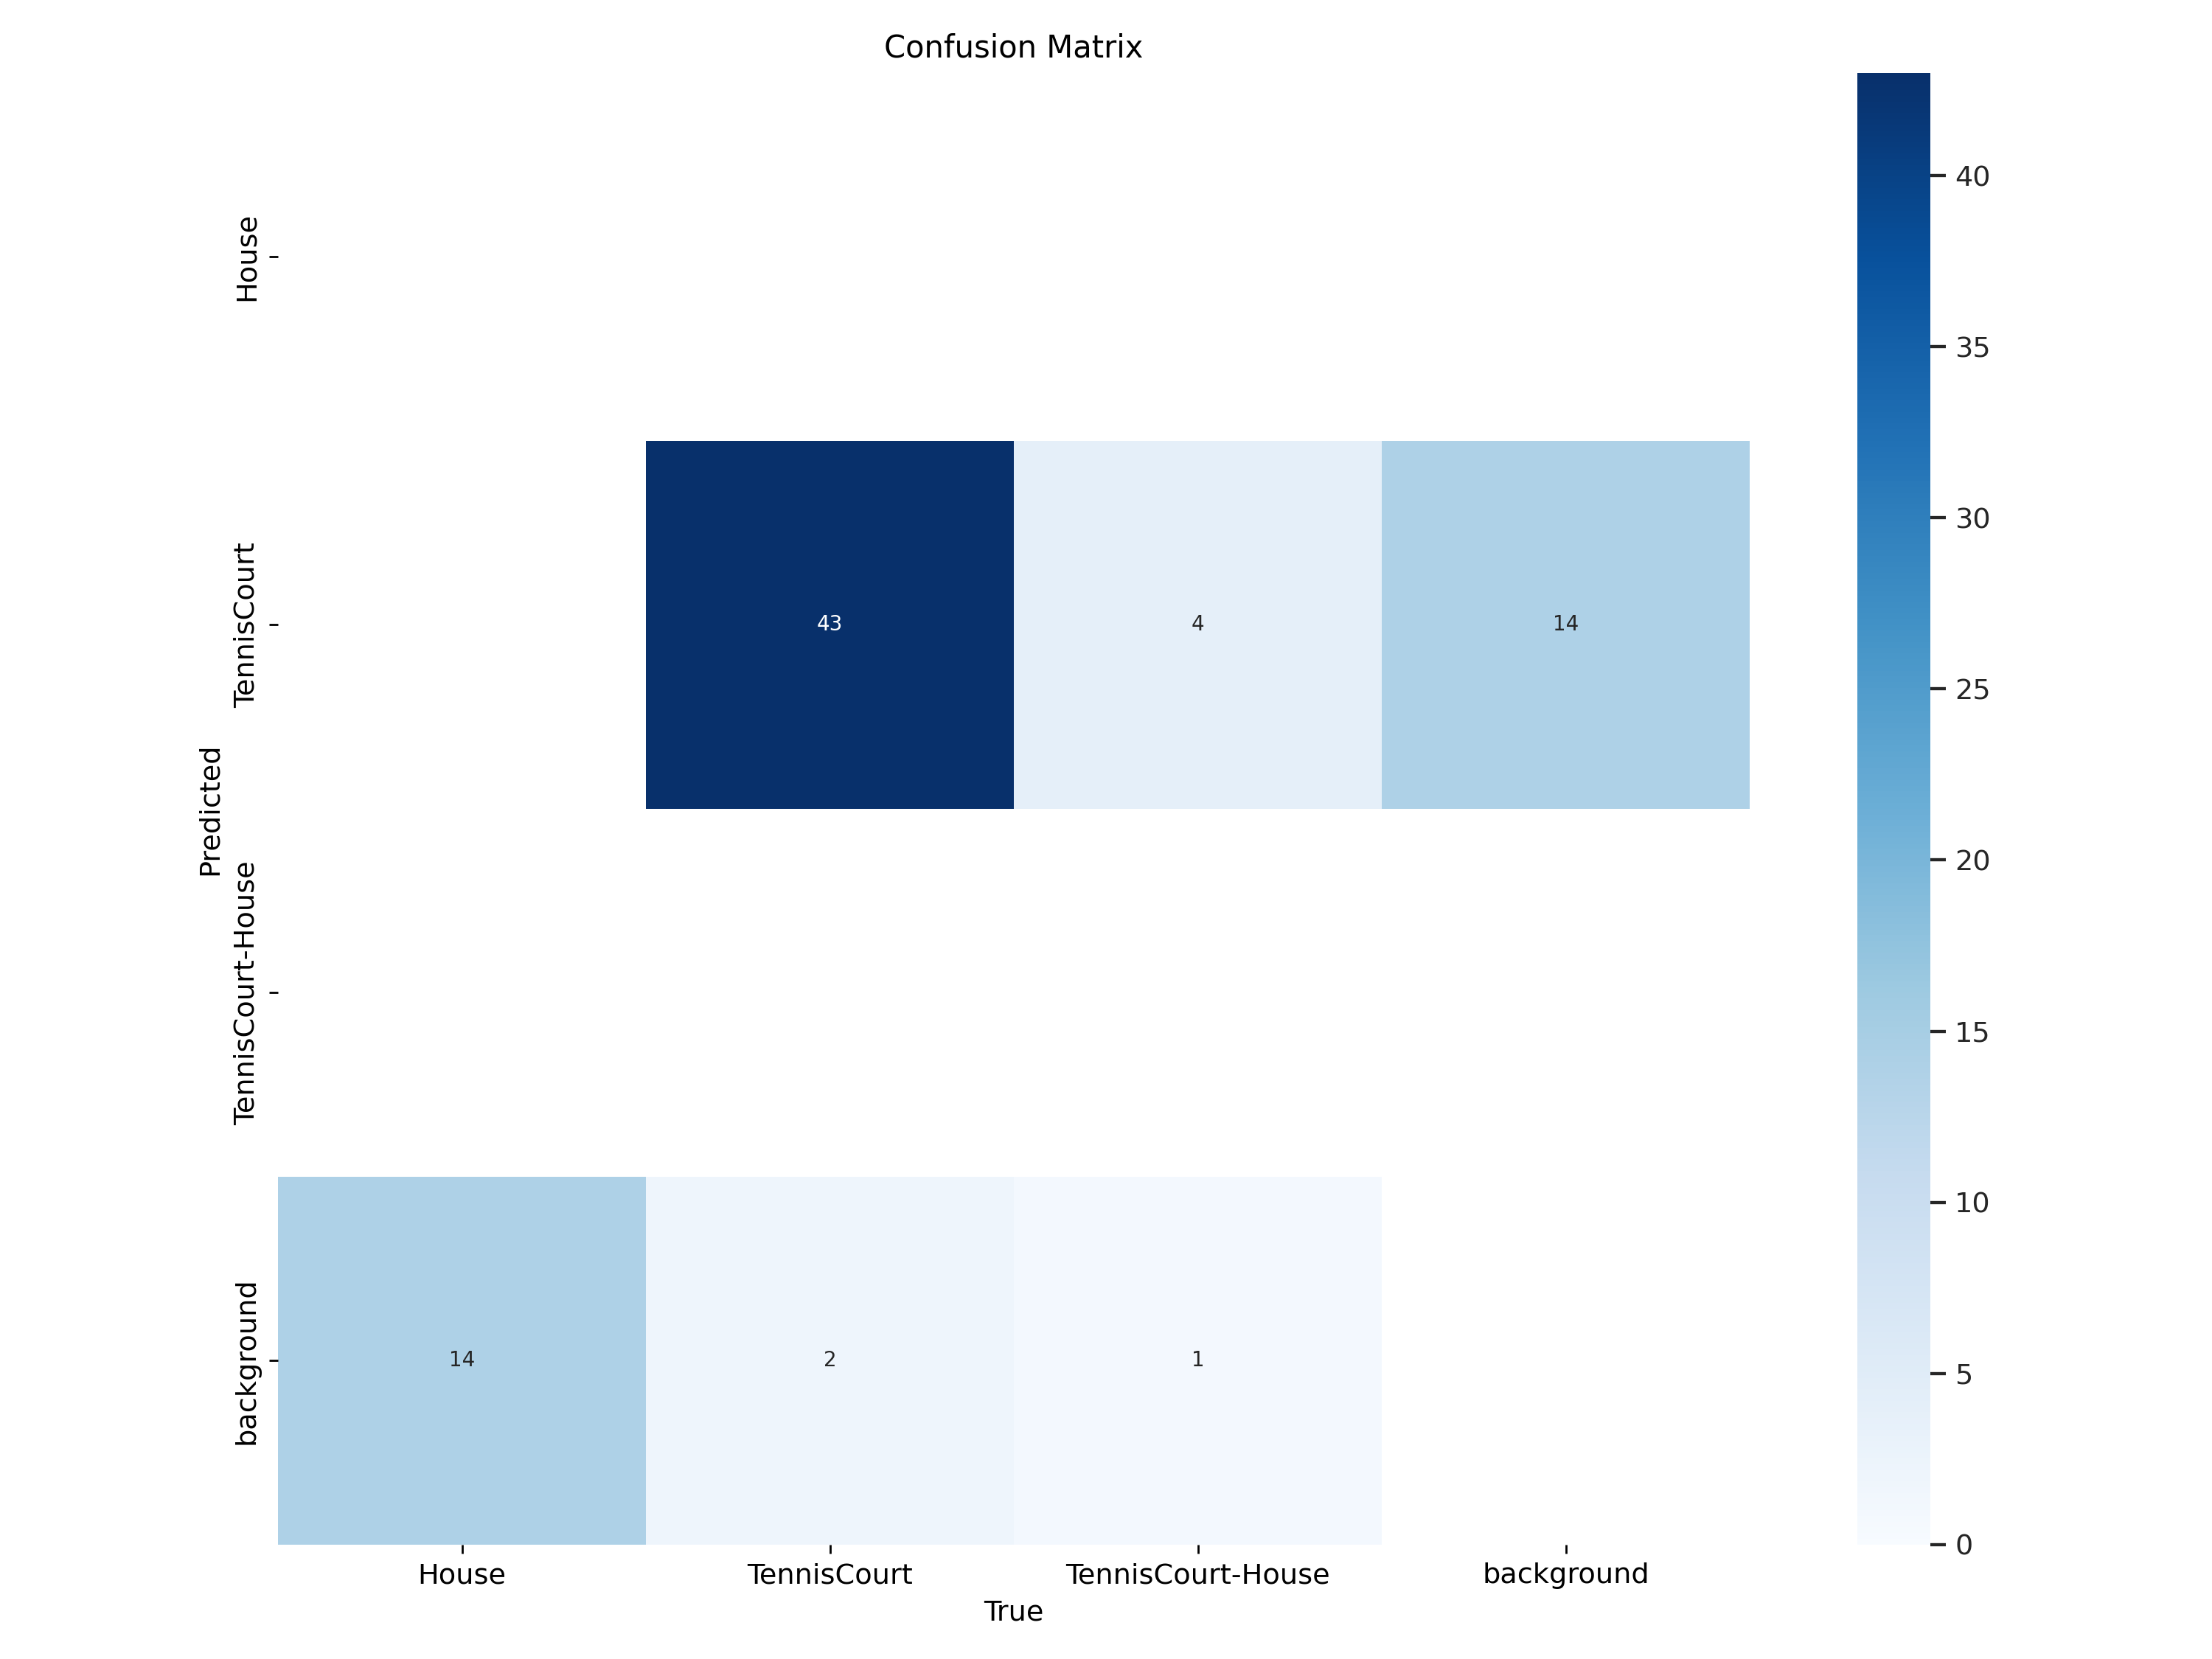

In [ ]:
Image(filename='runs/obb/train/confusion_matrix.png', width=600)

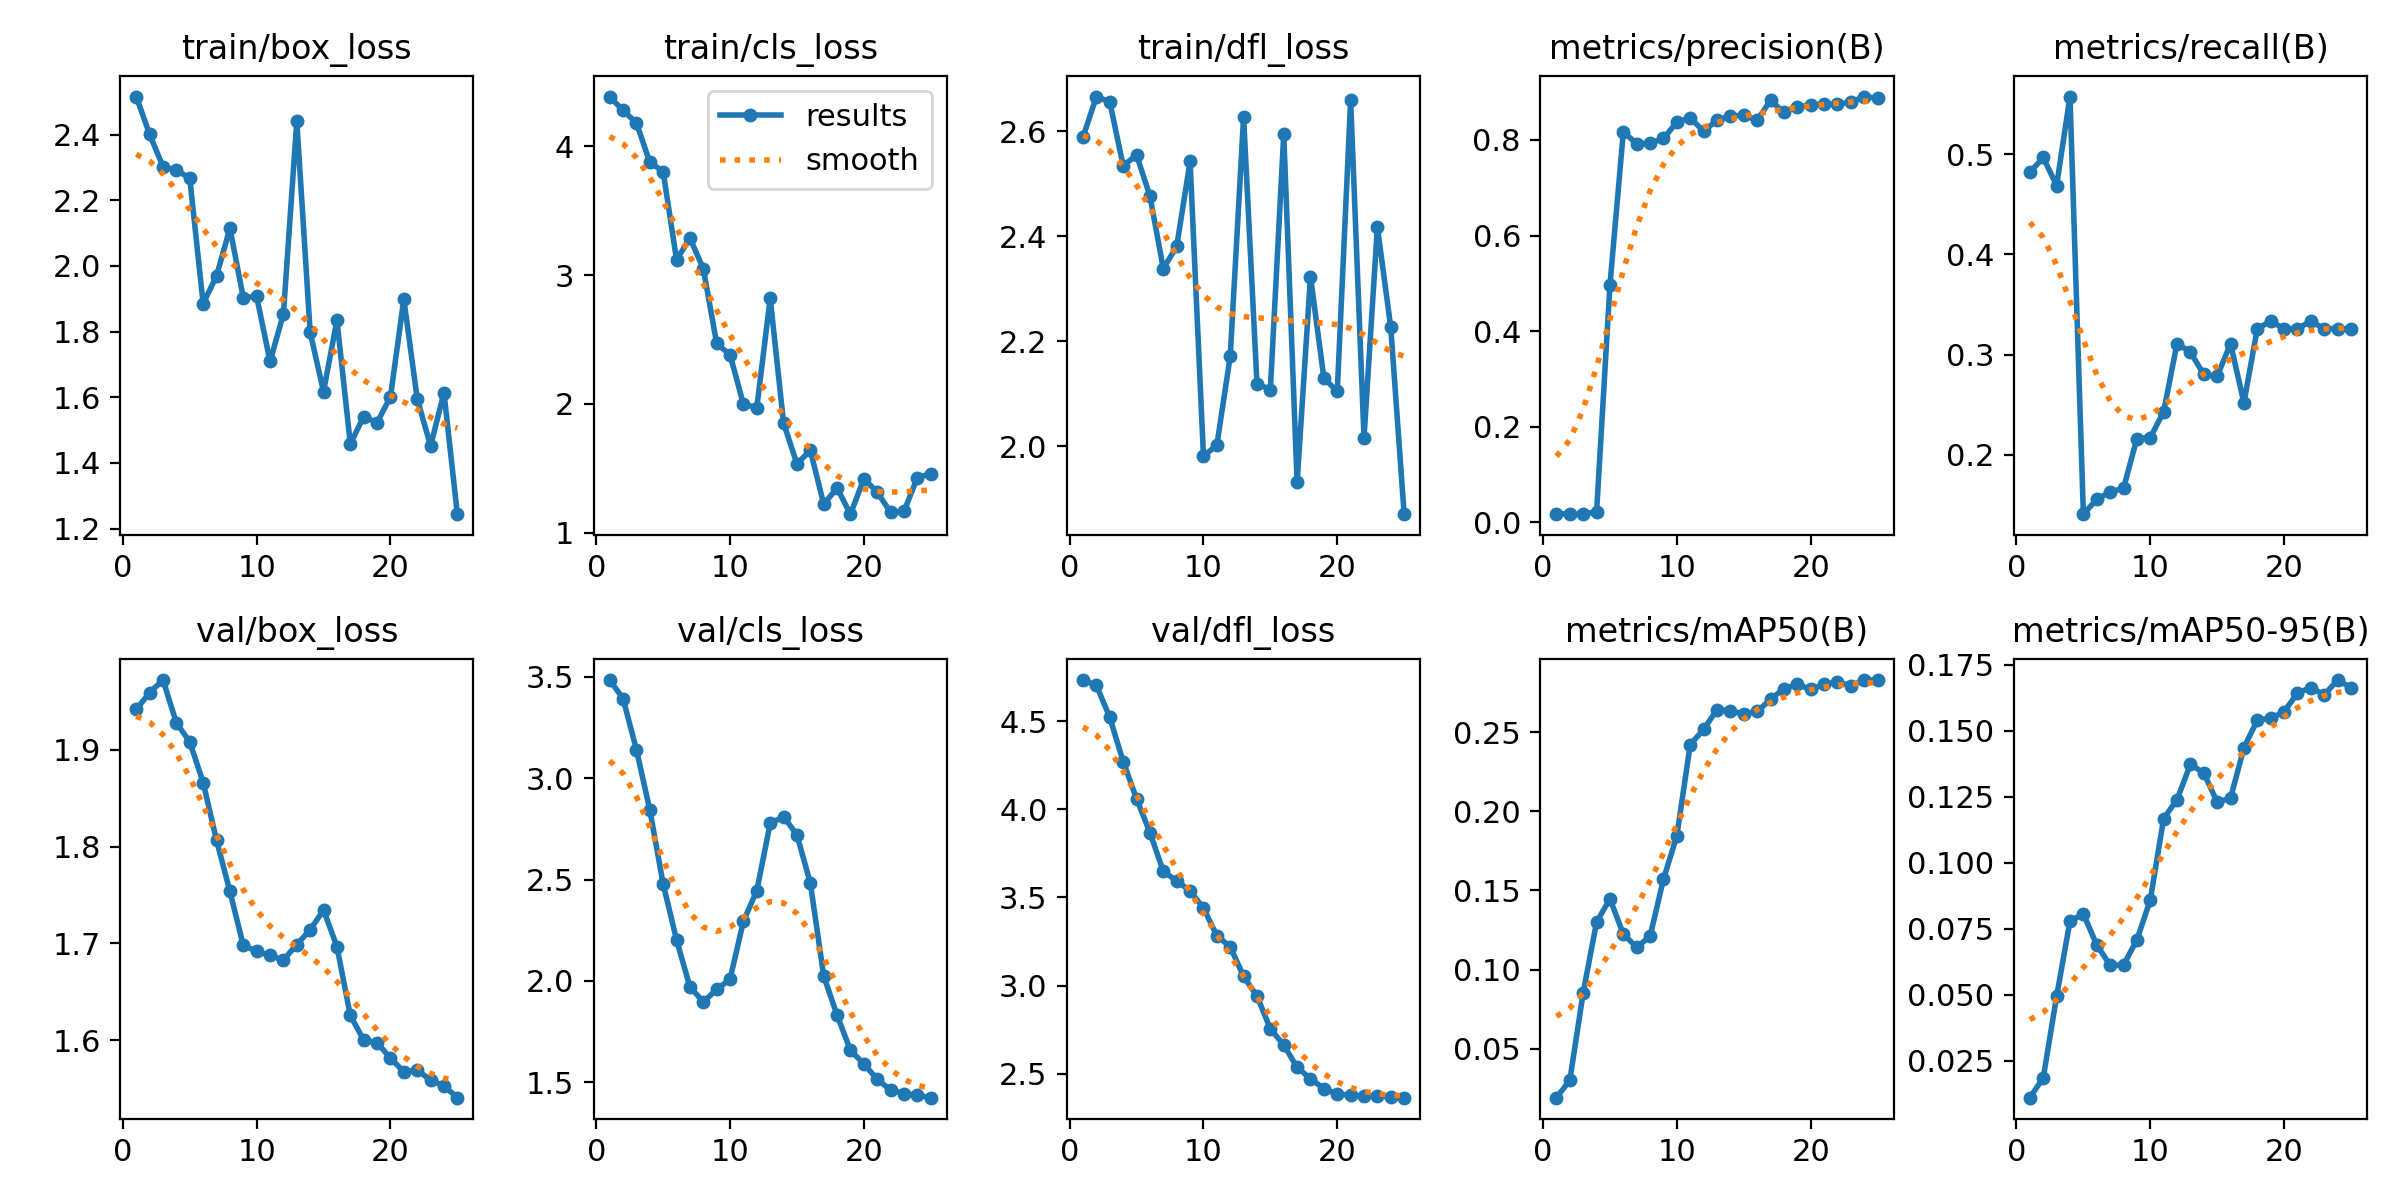

In [ ]:
Image(filename='runs/obb/train/results.png', width=600)

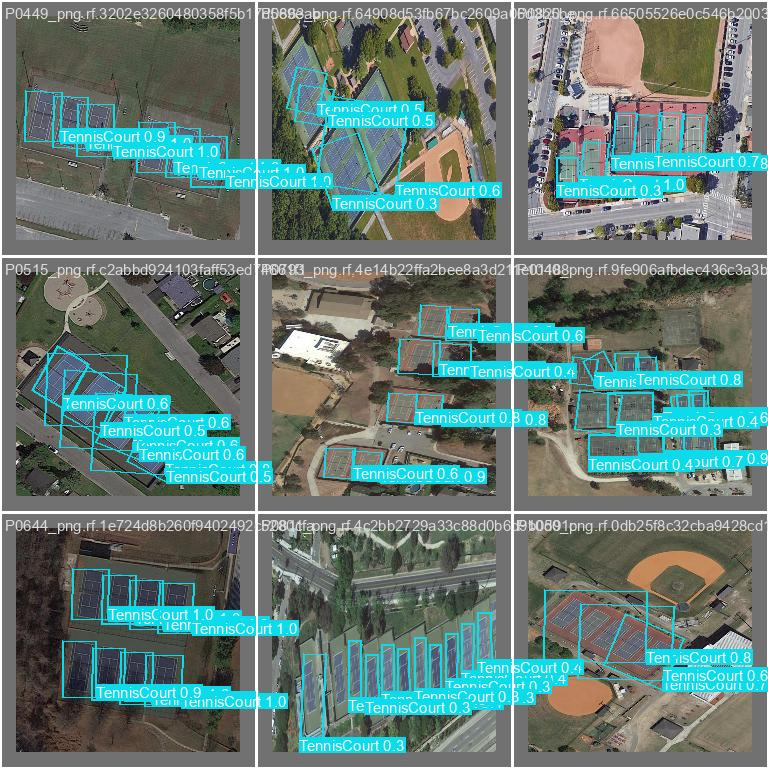

In [ ]:
Image(filename='runs/obb/train/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [ ]:
!yolo task=detect mode=val model=runs/obb/train/weights/best.pt data=data.yaml

WARNING ⚠️ conflicting 'task=detect' passed with 'task=obb' model. Ignoring 'task=detect' and updating to 'task=obb' to match model.
Ultralytics YOLOv8.2.81 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-obb summary (fused): 187 layers, 3,077,804 parameters, 0 gradients, 8.3 GFLOPs
val: Scanning /content/drive/MyDrive/yOLOV8/data/valid/labels.cache... 9 images, 0 backgrounds, 0 corrupt: 100% 9/9 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 1/1 [00:00<00:00,  2.05it/s]
                   all          9         64      0.891      0.326      0.283      0.169
                 House          5         14          1          0     0.0402     0.0126
           TennisCourt          8         45      0.672      0.978      0.804      0.493
     TennisCourt-House          2          5          1          0    0.00438    0.00109
Speed: 0.1ms preprocess, 16.7ms inference, 0.0ms loss, 21.7ms postprocess per im

## Inference with Custom Model

In [ ]:
!yolo task=detect mode=predict model=runs/obb/train/weights/best.pt conf=0.25 source=data/test/images

WARNING ⚠️ conflicting 'task=detect' passed with 'task=obb' model. Ignoring 'task=detect' and updating to 'task=obb' to match model.
Ultralytics YOLOv8.2.81 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-obb summary (fused): 187 layers, 3,077,804 parameters, 0 gradients, 8.3 GFLOPs

image 1/5 /content/drive/MyDrive/yOLOV8/data/test/images/P0211_png.rf.e6e317aae3e41eaae39df7d1278699c9.jpg: 224x224 10.0ms
image 2/5 /content/drive/MyDrive/yOLOV8/data/test/images/P0640_png.rf.dbf6311ee69c4b61df2ed712298feb5f.jpg: 224x224 11.6ms
image 3/5 /content/drive/MyDrive/yOLOV8/data/test/images/P0672_png.rf.2a65a8a9cf6b8b33c37574950bb188bb.jpg: 224x224 7.8ms
image 4/5 /content/drive/MyDrive/yOLOV8/data/test/images/P0675_png.rf.3da087fa77e9097086d85390d0999ac7.jpg: 224x224 7.7ms
image 5/5 /content/drive/MyDrive/yOLOV8/data/test/images/P0813_png.rf.cbcc4e378cea1660d5eacd1f2d0ae9c6.jpg: 224x224 8.0ms
Speed: 1.1ms preprocess, 9.0ms inference, 52.8ms postprocess per image at shape 

**NOTE:** Let's take a look at few results.

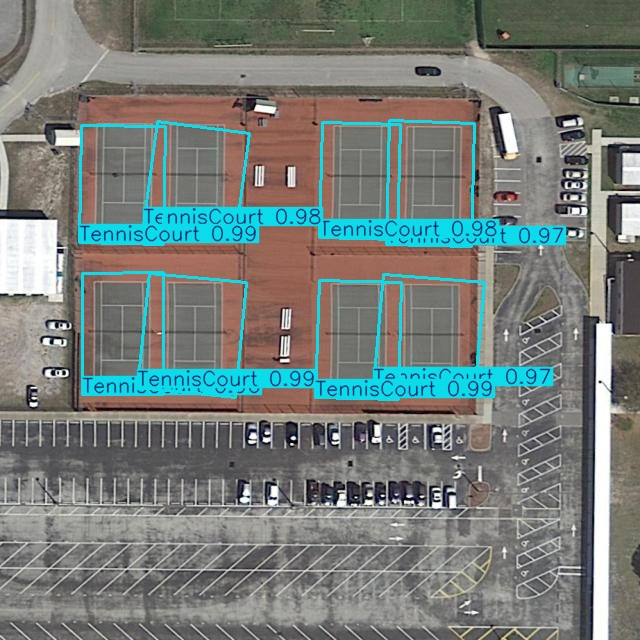

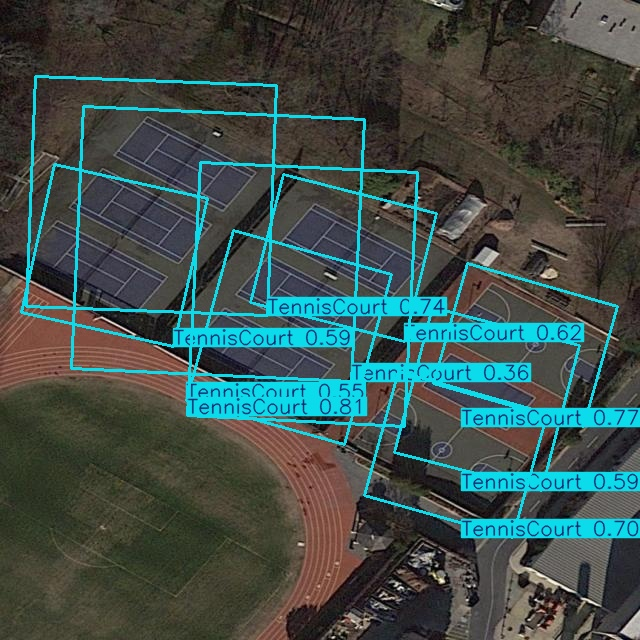

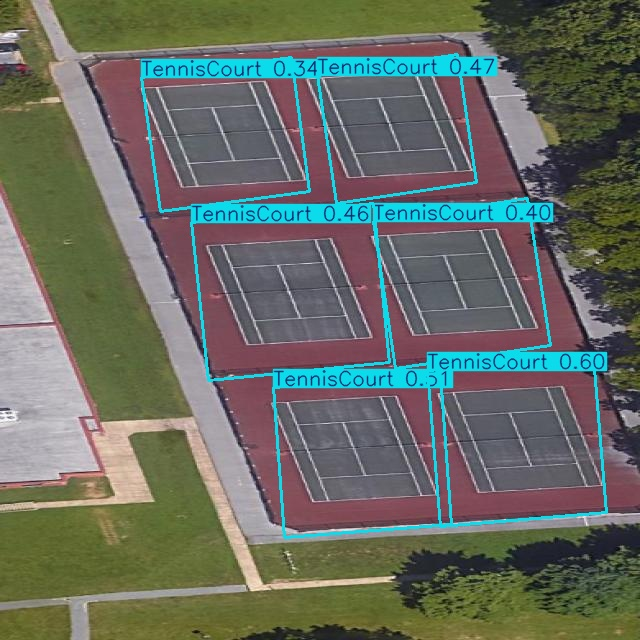

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob('runs/obb/predict/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")